In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
os.chdir('/Users/Max/Documents/Studium/Master/Semester 2/Programming/Scripts')

(60000, 28, 28)
(60000, 10)


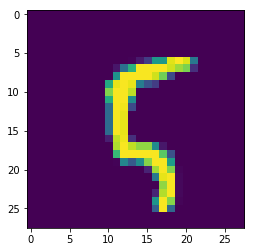

[0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01]


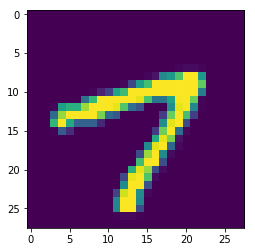

[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01]


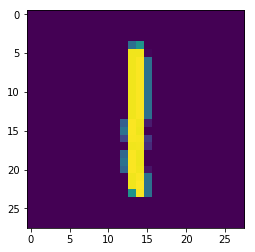

[0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


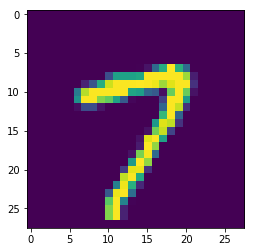

[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01]


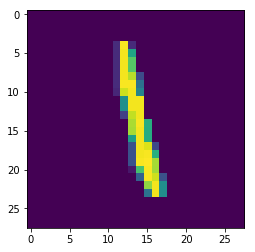

[0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


In [3]:
# Run pre-processing script to import dataset in usable format
%run ./Data_preprocessing.ipynb

In [119]:
# Simplify dataset by selecting only classes 0 and 1
train_images_simple = train_images[np.any(train_labels[:,[0,1]]==0.99, axis=1)]
train_labels_simple = train_labels[np.any(train_labels[:,[0,1]]==0.99, axis=1),:2]

In [229]:
class NeuralNetwork:
              
    def sigmoid(x):
        return 1/(1+np.exp(-x))
    
    def ReLU(x):
        return np.maximum(0.0, x)
    
    def __init__(self, design, step_size=0.01, activation_function=sigmoid, dropout=False, bias=False):
        self.design = design
        self.step_size = step_size
        self.activation_function = activation_function # does not work properly (cannot select ReLU)
        self.bias = bias
        self.dropout = dropout
        self.create_weights()
        self.activation = []
    
    def create_weights(self):
        self.weights = [np.zeros(0)]
        for i in np.arange(len(self.design)-1):
            self.weights.append(np.random.uniform(-1,1,[self.design[i+1], self.design[i]]))
    
    def one_training(self, input_data, target_data):
        
        # Convert data into coumn vectors
        input_vector = np.array(input_data.flatten(), ndmin=2).T
        target_vector = np.array(target_data, ndmin=2).T
        
        # Compute activation/output
        self.activation = [] # initialize activation list
        self.activation.append(input_vector)
        for i in np.arange(len(self.design)-1):
            self.activation.append(self.activation_function(self.weights[i+1] @ self.activation[i]))
            
        # Compute error
        error = target_vector - self.activation[-1]
        print('error: ' + str(error))
        
        # Update wih weights
        for i in np.arange(len(self.design)-1,0,-1): # move backwards through NN
            correction = self.step_size * ((error * self.activation[i] * (1.0 - self.activation[i])) @ self.activation[i-1].T)
            self.weights[i] += correction
            error = self.weights[i].T @ error
            
    def train(self, input_data, target_data, n_epoches=1, batch_size=100):
        
        # Divide data into mini-batches
        n_batches = int(len(input_data)/batch_size)
        index = np.repeat(np.arange(0,n_batches,1), batch_size)
        np.random.shuffle(index) # randomize assignment to batch    
        overlap = len(input_data) - len(index) # fill up
        index = np.append(index, index[:overlap])
        
        # Update weights for the mean error of every batch
        for b in np.arange(n_batches):
            print('b: ' + str(b))
            
            # Set up data
            input_batch = input_data[index==b,:,:]
            target_batch = target_data[index==b,:]
            error = np.array([0,0], ndmin=2).T # make compatiple to different n_output_nodes!!!
            
            # Compute error for every data point in mini-batch
            for d in np.arange(batch_size):
                print('d: '+str(d))
                # Convert input matrix and target vector to column vectors
                input_vector = np.array(input_batch[d].flatten(), ndmin=2).T
                target_vector = np.array(target_batch[d], ndmin=2).T
                
                # Compute output/activation of each layer
                self.activation = [] # initialize activation list
                self.activation.append(input_vector)
                for i in np.arange(len(self.design)-1):
                    self.activation.append(self.activation_function(self.weights[i+1] @ self.activation[i]))
                
                # Compute error
                error_data_point = target_vector - self.activation[-1]
                error = np.append(error, error_data_point, axis=1)
                print(error_data_point)
            
            # Compute mean error
            error = np.array(np.mean(error[:,1:], axis=1), ndmin=2).T
            print('mean error: ' + str(error))
            
            # Update who weights
            correction = self.step_size * error * self.activation[-1] * (1.0 - self.activation[-1]) @ self.activation[-2].T
            print('correction: ' + str(correction))
            self.weights[-1] += correction
            
            # Update wih weights
            for i in np.arange(len(self.design)-2,0,-1): # move backwards through NN
                error = self.weights[i+1].T @ error
                correction = self.step_size * ((error * self.activation[i] * (1.0 - self.activation[i])) @ self.activation[i-1].T)
                self.weights[i] += correction
    
    def run(self, input_data):
        
        # Convert data into column vector
        input_vector = np.array(input_data.flatten(), ndmin=2).T
        
        # Compute layer outputs/activations
        self.activation = [] # initialize activation list
        self.activation.append(input_vector)
        for i in np.arange(len(self.design)-1):
            self.activation.append(self.activation_function(self.weights[i+1] @ self.activation[i]))
            
        return self.activation[-1]
    
    def evaluate(self, input_data, target, performance_measure=True):
        pass

In [231]:
p = NeuralNetwork([784,10,2])

for i in np.arange(len(train_images_simple)):
    p.one_training(train_images_simple[i], train_labels_simple[i])

mean error: [[ 0.69812661]
 [-0.74613414]]
mean error: [[-0.2691763 ]
 [ 0.40579963]]
mean error: [[-0.41385362]
 [ 0.47274398]]
mean error: [[-0.47791488]
 [ 0.52851918]]
mean error: [[-0.44683794]
 [ 0.54131934]]
mean error: [[ 0.60067467]
 [-0.56261101]]
mean error: [[-0.24169042]
 [ 0.32978532]]
mean error: [[-0.52693915]
 [ 0.68768072]]
mean error: [[ 0.82481908]
 [-0.71225693]]
mean error: [[ 0.84136672]
 [-0.79784572]]
mean error: [[-0.37440836]
 [ 0.30000692]]
mean error: [[ 0.61653408]
 [-0.60651026]]
mean error: [[ 0.76360165]
 [-0.79610159]]
mean error: [[-0.23441243]
 [ 0.19530924]]
mean error: [[ 0.69503096]
 [-0.64062446]]
mean error: [[-0.17577568]
 [ 0.30053911]]
mean error: [[ 0.81982156]
 [-0.80546421]]
mean error: [[ 0.7997274 ]
 [-0.64627731]]
mean error: [[-0.34737553]
 [ 0.37411855]]
mean error: [[-0.36386863]
 [ 0.22177501]]
mean error: [[ 0.71796968]
 [-0.50750016]]
mean error: [[-0.18714295]
 [ 0.19005271]]
mean error: [[-0.29399923]
 [ 0.26961405]]
mean error:

mean error: [[-0.26063203]
 [ 0.47506297]]
mean error: [[-0.42733864]
 [ 0.40203955]]
mean error: [[-0.38696691]
 [ 0.33894357]]
mean error: [[ 0.32146002]
 [-0.29258802]]
mean error: [[ 0.66785497]
 [-0.54107151]]
mean error: [[-0.30685942]
 [ 0.18030606]]
mean error: [[ 0.5309646 ]
 [-0.49607741]]
mean error: [[ 0.55521619]
 [-0.67812219]]
mean error: [[-0.29593918]
 [ 0.30901992]]
mean error: [[ 0.59170958]
 [-0.33473988]]
mean error: [[-0.2580828 ]
 [ 0.36577112]]
mean error: [[ 0.34817953]
 [-0.37464329]]
mean error: [[ 0.49907756]
 [-0.45570232]]
mean error: [[-0.29841402]
 [ 0.13478029]]
mean error: [[ 0.42621549]
 [-0.40828622]]
mean error: [[ 0.37805233]
 [-0.4180923 ]]
mean error: [[-0.25020675]
 [ 0.253352  ]]
mean error: [[-0.28957107]
 [ 0.27242478]]
mean error: [[ 0.48460412]
 [-0.27080849]]
mean error: [[-0.21462535]
 [ 0.20264701]]
mean error: [[-0.45671027]
 [ 0.34526669]]
mean error: [[-0.31406294]
 [ 0.31327771]]
mean error: [[ 0.24706899]
 [-0.29772271]]
mean error:

mean error: [[ 0.30958714]
 [-0.47602136]]
mean error: [[-0.34613544]
 [ 0.44690936]]
mean error: [[ 0.40262876]
 [-0.27215482]]
mean error: [[ 0.27810947]
 [-0.26560841]]
mean error: [[ 0.26036391]
 [-0.29502595]]
mean error: [[-0.24518909]
 [ 0.1364041 ]]
mean error: [[-0.16465085]
 [ 0.0922601 ]]
mean error: [[ 0.38398471]
 [-0.12121013]]
mean error: [[ 0.370045  ]
 [-0.49447781]]
mean error: [[-0.17773492]
 [ 0.14583101]]
mean error: [[-0.53729524]
 [ 0.72613366]]
mean error: [[-0.19725618]
 [ 0.11910612]]
mean error: [[-0.20505731]
 [ 0.20632695]]
mean error: [[ 0.6046886 ]
 [-0.61868006]]
mean error: [[ 0.51590452]
 [-0.19300421]]
mean error: [[-0.20774446]
 [ 0.16463187]]
mean error: [[-0.17593888]
 [ 0.10876784]]
mean error: [[-0.46616596]
 [ 0.25725191]]
mean error: [[-0.30396615]
 [ 0.27572984]]
mean error: [[ 0.41984342]
 [-0.6215421 ]]
mean error: [[-0.29441931]
 [ 0.31124809]]
mean error: [[ 0.34792184]
 [-0.34222508]]
mean error: [[-0.19673654]
 [ 0.1066738 ]]
mean error:

mean error: [[-0.0999087 ]
 [ 0.07984285]]
mean error: [[ 0.34497693]
 [-0.26493727]]
mean error: [[-0.28742804]
 [ 0.19919375]]
mean error: [[ 0.21245994]
 [-0.20601574]]
mean error: [[ 0.29328967]
 [-0.23511656]]
mean error: [[ 0.29912637]
 [-0.1654333 ]]
mean error: [[ 0.25508183]
 [-0.09492615]]
mean error: [[-0.2134653 ]
 [ 0.19985822]]
mean error: [[-0.1815644 ]
 [ 0.23531997]]
mean error: [[ 0.4423428 ]
 [-0.34182465]]
mean error: [[ 0.25056824]
 [-0.25017028]]
mean error: [[-0.38939122]
 [ 0.34440068]]
mean error: [[ 0.39005375]
 [-0.37960002]]
mean error: [[-0.07423822]
 [ 0.03837837]]
mean error: [[ 0.23992663]
 [-0.14488006]]
mean error: [[ 0.42260852]
 [-0.4656394 ]]
mean error: [[ 0.24143724]
 [-0.0989474 ]]
mean error: [[-0.0874767 ]
 [ 0.06957427]]
mean error: [[ 0.2289096 ]
 [-0.23540124]]
mean error: [[ 0.32104926]
 [-0.1879258 ]]
mean error: [[-0.08710954]
 [ 0.03141219]]
mean error: [[-0.23178047]
 [ 0.17861265]]
mean error: [[-0.15815139]
 [ 0.14093641]]
mean error:

mean error: [[-0.30203444]
 [ 0.23226155]]
mean error: [[ 0.19948415]
 [-0.1553196 ]]
mean error: [[ 0.2184235 ]
 [-0.15071149]]
mean error: [[-0.08948694]
 [ 0.07160941]]
mean error: [[ 0.24094657]
 [-0.15654379]]
mean error: [[ 0.28185109]
 [-0.15256764]]
mean error: [[-0.19271178]
 [ 0.12930385]]
mean error: [[ 0.39119982]
 [-0.17251415]]
mean error: [[ 0.18375562]
 [-0.15469454]]
mean error: [[ 0.26069662]
 [-0.29716691]]
mean error: [[ 0.17572097]
 [-0.22613967]]
mean error: [[-0.54655318]
 [ 0.81913475]]
mean error: [[-0.05567923]
 [ 0.0302906 ]]
mean error: [[ 0.2847999 ]
 [-0.08966363]]
mean error: [[-0.10398608]
 [ 0.06392737]]
mean error: [[-0.24432283]
 [ 0.33460016]]
mean error: [[ 0.24492677]
 [-0.3522563 ]]
mean error: [[-0.35648853]
 [ 0.27470309]]
mean error: [[-0.07457218]
 [ 0.04645134]]
mean error: [[ 0.21881243]
 [-0.1517585 ]]
mean error: [[ 0.2276288 ]
 [-0.15125735]]
mean error: [[-0.07961362]
 [ 0.06221171]]
mean error: [[ 0.24069144]
 [-0.21179085]]
mean error:

mean error: [[-0.09732789]
 [ 0.0650334 ]]
mean error: [[-0.10609939]
 [ 0.07747454]]
mean error: [[-0.14189877]
 [ 0.09629851]]
mean error: [[ 0.19918434]
 [-0.12780329]]
mean error: [[-0.09951296]
 [ 0.07384635]]
mean error: [[-0.06070796]
 [ 0.03744634]]
mean error: [[-0.18622469]
 [ 0.18694527]]
mean error: [[ 0.11618711]
 [-0.08170698]]
mean error: [[-0.05955165]
 [ 0.03576143]]
mean error: [[ 0.21390118]
 [-0.14618836]]
mean error: [[ 0.21539803]
 [-0.22267071]]
mean error: [[ 0.25617144]
 [-0.09539359]]
mean error: [[ 0.3184108 ]
 [-0.27373104]]
mean error: [[-0.09492771]
 [ 0.06061191]]
mean error: [[ 0.30715571]
 [-0.11149447]]
mean error: [[-0.05222621]
 [ 0.03473183]]
mean error: [[ 0.14009129]
 [-0.08303366]]
mean error: [[-0.09567177]
 [ 0.07612933]]
mean error: [[-0.10707394]
 [ 0.04885923]]
mean error: [[-0.10292092]
 [ 0.08783504]]
mean error: [[ 0.38654657]
 [-0.43192892]]
mean error: [[ 0.47580516]
 [-0.34584932]]
mean error: [[ 0.41363916]
 [-0.18687478]]
mean error:

 [-0.08214127]]
mean error: [[-0.05654784]
 [ 0.02018512]]
mean error: [[ 0.15177071]
 [-0.1826395 ]]
mean error: [[-0.07282636]
 [ 0.04440611]]
mean error: [[-0.13837681]
 [ 0.1361017 ]]
mean error: [[ 0.1269791 ]
 [-0.04724904]]
mean error: [[ 0.13137116]
 [-0.07806602]]
mean error: [[ 0.1635296 ]
 [-0.06870363]]
mean error: [[-0.0629518 ]
 [ 0.04110743]]
mean error: [[-0.04608704]
 [ 0.02410613]]
mean error: [[-0.04371695]
 [ 0.02114412]]
mean error: [[-0.10275764]
 [ 0.06380557]]
mean error: [[-0.05638953]
 [ 0.04122518]]
mean error: [[-0.04397206]
 [ 0.01999787]]
mean error: [[ 0.49656016]
 [-0.62264425]]
mean error: [[ 0.17067437]
 [-0.05577174]]
mean error: [[-0.05168323]
 [ 0.03115597]]
mean error: [[ 0.12179062]
 [-0.03823933]]
mean error: [[-0.14279908]
 [ 0.0908829 ]]
mean error: [[-0.05785452]
 [ 0.02321962]]
mean error: [[-0.04728418]
 [ 0.02853033]]
mean error: [[ 0.09987666]
 [-0.04032664]]
mean error: [[ 0.13395153]
 [-0.04908259]]
mean error: [[-0.07426408]
 [ 0.059835

mean error: [[-0.04202693]
 [ 0.02265963]]
mean error: [[-0.15486804]
 [ 0.12816573]]
mean error: [[-0.05687626]
 [ 0.048903  ]]
mean error: [[-0.10936013]
 [ 0.08640085]]
mean error: [[ 0.10124043]
 [-0.06832578]]
mean error: [[-0.03966519]
 [ 0.02147454]]
mean error: [[ 0.12061929]
 [-0.09281718]]
mean error: [[-0.0513197 ]
 [ 0.03087633]]
mean error: [[ 0.12204592]
 [-0.211161  ]]
mean error: [[ 0.10337163]
 [-0.038379  ]]
mean error: [[ 0.42074814]
 [-0.14893858]]
mean error: [[-0.30532281]
 [ 0.37243503]]
mean error: [[ 0.1205096 ]
 [-0.11632859]]
mean error: [[-0.04204919]
 [ 0.0231505 ]]
mean error: [[-0.11907346]
 [ 0.1045552 ]]
mean error: [[ 0.25998729]
 [-0.14928115]]
mean error: [[-0.05790491]
 [ 0.02514788]]
mean error: [[ 0.18744163]
 [-0.04357194]]
mean error: [[ 0.11007904]
 [-0.04321256]]
mean error: [[-0.06784401]
 [ 0.05093882]]
mean error: [[ 0.13338326]
 [-0.12320075]]
mean error: [[ 0.19447061]
 [-0.38024066]]
mean error: [[ 0.27470317]
 [-0.10213441]]
mean error:

mean error: [[-0.03679596]
 [ 0.0207002 ]]
mean error: [[-0.25084458]
 [ 0.19523998]]
mean error: [[ 0.08540288]
 [-0.04525215]]
mean error: [[ 0.29763789]
 [-0.18440769]]
mean error: [[-0.09088223]
 [ 0.09642514]]
mean error: [[ 0.12384922]
 [-0.15430678]]
mean error: [[ 0.15667818]
 [-0.16664098]]
mean error: [[ 0.11126958]
 [-0.0331777 ]]
mean error: [[-0.12009384]
 [ 0.15813901]]
mean error: [[ 0.10838504]
 [-0.08862433]]
mean error: [[-0.128873 ]
 [ 0.0801689]]
mean error: [[-0.04749374]
 [ 0.02218583]]
mean error: [[ 0.07884541]
 [-0.04004195]]
mean error: [[-0.04753209]
 [ 0.02836915]]
mean error: [[ 0.103567  ]
 [-0.16690287]]
mean error: [[-0.098539  ]
 [ 0.14748608]]
mean error: [[ 0.18195594]
 [-0.2272233 ]]
mean error: [[ 0.12518653]
 [-0.15533487]]
mean error: [[ 0.12222291]
 [-0.04717685]]
mean error: [[ 0.10281575]
 [-0.12260469]]
mean error: [[ 0.07723639]
 [-0.04293865]]
mean error: [[-0.05944908]
 [ 0.05277566]]
mean error: [[ 0.17905898]
 [-0.07261323]]
mean error: [

mean error: [[ 0.13255472]
 [-0.09638301]]
mean error: [[-0.04349879]
 [ 0.023416  ]]
mean error: [[ 0.10932351]
 [-0.03934489]]
mean error: [[-0.03829106]
 [ 0.01616108]]
mean error: [[ 0.10985726]
 [-0.03397903]]
mean error: [[-0.04069235]
 [ 0.01921842]]
mean error: [[-0.06694156]
 [ 0.04439841]]
mean error: [[-0.16351305]
 [ 0.12280281]]
mean error: [[ 0.07584309]
 [-0.03971287]]
mean error: [[-0.2324806 ]
 [ 0.23380949]]
mean error: [[-0.05542539]
 [ 0.05182796]]
mean error: [[-0.20145675]
 [ 0.28148746]]
mean error: [[ 0.15191088]
 [-0.0846055 ]]
mean error: [[-0.03397526]
 [ 0.01818158]]
mean error: [[ 0.11098085]
 [-0.03455804]]
mean error: [[-0.03596756]
 [ 0.01881005]]
mean error: [[-0.14654106]
 [ 0.21724576]]
mean error: [[ 0.1347448 ]
 [-0.04121543]]
mean error: [[-0.04112229]
 [ 0.02789828]]
mean error: [[-0.06454261]
 [ 0.04320719]]
mean error: [[ 0.07111355]
 [-0.03991598]]
mean error: [[-0.06954628]
 [ 0.05508498]]
mean error: [[ 0.10801904]
 [-0.0358801 ]]
mean error:

mean error: [[-0.03498408]
 [ 0.03362317]]
mean error: [[-0.03901514]
 [ 0.0188539 ]]
mean error: [[-0.05417101]
 [ 0.03351294]]
mean error: [[ 0.11024164]
 [-0.1437877 ]]
mean error: [[-0.0526442 ]
 [ 0.01898849]]
mean error: [[ 0.07312126]
 [-0.04557772]]
mean error: [[-0.06590555]
 [ 0.04523243]]
mean error: [[-0.03452403]
 [ 0.01619601]]
mean error: [[-0.05494626]
 [ 0.0616587 ]]
mean error: [[ 0.14270817]
 [-0.07161362]]
mean error: [[ 0.07708941]
 [-0.0493241 ]]
mean error: [[-0.08644759]
 [ 0.02465228]]
mean error: [[-0.05902305]
 [ 0.04001339]]
mean error: [[-0.03183925]
 [ 0.01719451]]
mean error: [[-0.03414856]
 [ 0.01990826]]
mean error: [[ 0.17768951]
 [-0.09524209]]
mean error: [[ 0.17309858]
 [-0.08036222]]
mean error: [[ 0.67798102]
 [-0.59763341]]
mean error: [[-0.13171919]
 [ 0.05553238]]
mean error: [[-0.03390477]
 [ 0.02000163]]
mean error: [[-0.03715967]
 [ 0.02270513]]
mean error: [[-0.03174053]
 [ 0.01660503]]
mean error: [[-0.04207012]
 [ 0.02665825]]
mean error:

mean error: [[-0.05472772]
 [ 0.03138264]]
mean error: [[ 0.29564971]
 [-0.3251047 ]]
mean error: [[-0.09638449]
 [ 0.11627105]]
mean error: [[ 0.09617778]
 [-0.08724999]]
mean error: [[-0.10493538]
 [ 0.15443435]]
mean error: [[ 0.08041669]
 [-0.03591145]]
mean error: [[-0.09157507]
 [ 0.089627  ]]
mean error: [[-0.03425461]
 [ 0.01920439]]
mean error: [[ 0.54807005]
 [-0.54842614]]
mean error: [[ 0.13940878]
 [-0.04656481]]
mean error: [[-0.10491663]
 [ 0.13961629]]
mean error: [[ 0.07047948]
 [-0.04307631]]
mean error: [[-0.05531845]
 [ 0.04028106]]
mean error: [[-0.03245646]
 [ 0.01636814]]
mean error: [[ 0.06808346]
 [-0.04652639]]
mean error: [[-0.03431993]
 [ 0.02000102]]
mean error: [[-0.03466929]
 [ 0.01959198]]
mean error: [[-0.05849351]
 [ 0.03257786]]
mean error: [[-0.07702642]
 [ 0.04333096]]
mean error: [[-0.068809 ]
 [ 0.0361039]]
mean error: [[-0.06576687]
 [ 0.03816784]]
mean error: [[-0.09192482]
 [ 0.1668077 ]]
mean error: [[ 0.37055202]
 [-0.41997745]]
mean error: [

 [ 0.03909715]]
mean error: [[-0.03510688]
 [ 0.02188963]]
mean error: [[ 0.07619058]
 [-0.04037773]]
mean error: [[-0.09970572]
 [ 0.0755753 ]]
mean error: [[-0.04775176]
 [ 0.0262889 ]]
mean error: [[ 0.08397718]
 [-0.03780075]]
mean error: [[-0.03495731]
 [ 0.01776843]]
mean error: [[-0.0309751]
 [ 0.0163522]]
mean error: [[-0.08386329]
 [ 0.03888506]]
mean error: [[-0.07305941]
 [ 0.04300366]]
mean error: [[-0.03865655]
 [ 0.02599484]]
mean error: [[ 0.0941033 ]
 [-0.03443473]]
mean error: [[ 0.06053937]
 [-0.03844275]]
mean error: [[ 0.08390799]
 [-0.04619016]]
mean error: [[ 0.09820594]
 [-0.17131026]]
mean error: [[-0.14831219]
 [ 0.11780203]]
mean error: [[-0.04271772]
 [ 0.03324506]]
mean error: [[ 0.10141021]
 [-0.03941137]]
mean error: [[-0.03360676]
 [ 0.01700774]]
mean error: [[ 0.23666303]
 [-0.19269355]]
mean error: [[ 0.05988079]
 [-0.03795231]]
mean error: [[-0.28019244]
 [ 0.43109036]]
mean error: [[-0.03946937]
 [ 0.02123586]]
mean error: [[-0.03736831]
 [ 0.01940732

mean error: [[-0.03459632]
 [ 0.01996274]]
mean error: [[-0.12962815]
 [ 0.1933105 ]]
mean error: [[-0.11538675]
 [ 0.16923266]]
mean error: [[-0.04099807]
 [ 0.02224565]]
mean error: [[-0.12229654]
 [ 0.08936986]]
mean error: [[ 0.16515175]
 [-0.0452154 ]]
mean error: [[ 0.0961484 ]
 [-0.05131011]]
mean error: [[ 0.08060445]
 [-0.03420223]]
mean error: [[-0.03280849]
 [ 0.01790377]]
mean error: [[ 0.05959828]
 [-0.04045923]]
mean error: [[ 0.1118481 ]
 [-0.05581424]]
mean error: [[-0.04414767]
 [ 0.02189544]]
mean error: [[-0.03648909]
 [ 0.01515051]]
mean error: [[-0.04677138]
 [ 0.02211578]]
mean error: [[-0.08764014]
 [ 0.06794303]]
mean error: [[ 0.07489942]
 [-0.03889382]]
mean error: [[-0.10779988]
 [ 0.19702942]]
mean error: [[ 0.18559733]
 [-0.09844832]]
mean error: [[-0.04088187]
 [ 0.01398636]]
mean error: [[-0.096526  ]
 [ 0.08472614]]
mean error: [[ 0.11930648]
 [-0.04081966]]
mean error: [[-0.04270347]
 [ 0.028667  ]]
mean error: [[ 0.08514324]
 [-0.03934836]]
mean error:

mean error: [[ 0.10421632]
 [-0.05722012]]
mean error: [[ 0.10777102]
 [-0.04458213]]
mean error: [[ 0.07468601]
 [-0.03412464]]
mean error: [[-0.08876887]
 [ 0.0769881 ]]
mean error: [[-0.11624931]
 [ 0.09251849]]
mean error: [[-0.19367723]
 [ 0.25234792]]
mean error: [[ 0.08278207]
 [-0.03542573]]
mean error: [[ 0.0923858 ]
 [-0.03189776]]
mean error: [[-0.04891776]
 [ 0.01385791]]
mean error: [[-0.19179157]
 [ 0.12272378]]
mean error: [[ 0.19493476]
 [-0.11378034]]
mean error: [[-0.03682021]
 [ 0.01709866]]
mean error: [[ 0.09114467]
 [-0.05515889]]
mean error: [[ 0.12701825]
 [-0.06268804]]
mean error: [[-0.02983833]
 [ 0.014242  ]]
mean error: [[-0.031655  ]
 [ 0.01745331]]
mean error: [[-0.06354813]
 [ 0.05081503]]
mean error: [[-0.04412204]
 [ 0.01999013]]
mean error: [[ 0.06499978]
 [-0.03700645]]
mean error: [[-0.07123473]
 [ 0.06133471]]
mean error: [[ 0.05620308]
 [-0.03700153]]
mean error: [[ 0.07455958]
 [-0.03458514]]
mean error: [[-0.04668671]
 [ 0.05385594]]
mean error:

mean error: [[-0.05906673]
 [ 0.03295402]]
mean error: [[-0.03322554]
 [ 0.01859599]]
mean error: [[-0.05872481]
 [ 0.04124715]]
mean error: [[ 0.05782708]
 [-0.03721761]]
mean error: [[ 0.07791713]
 [-0.0331079 ]]
mean error: [[ 0.09558088]
 [-0.10001848]]
mean error: [[-0.17156681]
 [ 0.211788  ]]
mean error: [[-0.03742188]
 [ 0.01909106]]
mean error: [[ 0.09558788]
 [-0.10632725]]
mean error: [[-0.04483815]
 [ 0.01707122]]
mean error: [[-0.0816857 ]
 [ 0.05184227]]
mean error: [[-0.0335982 ]
 [ 0.02200046]]
mean error: [[ 0.18602315]
 [-0.07953054]]
mean error: [[ 0.06490759]
 [-0.03502511]]
mean error: [[ 0.07388624]
 [-0.05279099]]
mean error: [[ 0.09015646]
 [-0.03187601]]
mean error: [[-0.03592111]
 [ 0.01933654]]
mean error: [[ 0.09411231]
 [-0.03428065]]
mean error: [[ 0.05621129]
 [-0.03804523]]
mean error: [[-0.03503632]
 [ 0.01897584]]
mean error: [[-0.20444907]
 [ 0.10580902]]
mean error: [[-0.0563735 ]
 [ 0.02813464]]
mean error: [[ 0.08963515]
 [-0.0326638 ]]
mean error:

mean error: [[ 0.0524938 ]
 [-0.03653918]]
mean error: [[-0.03648925]
 [ 0.0252424 ]]
mean error: [[ 0.05233763]
 [-0.03638481]]
mean error: [[-0.03291947]
 [ 0.01646409]]
mean error: [[-0.04238534]
 [ 0.01449886]]
mean error: [[-0.03505687]
 [ 0.02284226]]
mean error: [[ 0.16994163]
 [-0.15885662]]
mean error: [[ 0.15874738]
 [-0.25377261]]
mean error: [[ 0.17447395]
 [-0.0931397 ]]
mean error: [[-0.02918615]
 [ 0.01404513]]
mean error: [[ 0.05272689]
 [-0.0363383 ]]
mean error: [[ 0.05239226]
 [-0.03624987]]
mean error: [[ 0.0554969 ]
 [-0.03762872]]
mean error: [[-0.03254476]
 [ 0.01833823]]
mean error: [[ 0.05512501]
 [-0.03724028]]
mean error: [[-0.02778743]
 [ 0.01423524]]
mean error: [[-0.0786273 ]
 [ 0.06247985]]
mean error: [[-0.05170931]
 [ 0.03764418]]
mean error: [[-0.03939211]
 [ 0.02382622]]
mean error: [[ 0.05224452]
 [-0.03639128]]
mean error: [[ 0.08867285]
 [-0.03488844]]
mean error: [[ 0.07889058]
 [-0.08342484]]
mean error: [[ 0.10610358]
 [-0.05394613]]
mean error:

mean error: [[-0.02993886]
 [ 0.01681547]]
mean error: [[ 0.09274102]
 [-0.03648999]]
mean error: [[-0.07242639]
 [ 0.07435095]]
mean error: [[ 0.05831756]
 [-0.04073351]]
mean error: [[ 0.05103572]
 [-0.03562124]]
mean error: [[-0.05830819]
 [ 0.05443022]]
mean error: [[ 0.0573529 ]
 [-0.03495459]]
mean error: [[ 0.07629864]
 [-0.05849927]]
mean error: [[ 0.0824748 ]
 [-0.03533245]]
mean error: [[-0.03879809]
 [ 0.02146588]]
mean error: [[ 0.08041334]
 [-0.03228094]]
mean error: [[-0.0333775 ]
 [ 0.02879884]]
mean error: [[ 0.08078902]
 [-0.0319017 ]]
mean error: [[-0.03805797]
 [ 0.02250921]]
mean error: [[-0.06056124]
 [ 0.04486678]]
mean error: [[ 0.0771875 ]
 [-0.06178049]]
mean error: [[-0.09168437]
 [ 0.07051867]]
mean error: [[-0.06461186]
 [ 0.04671363]]
mean error: [[-0.05813011]
 [ 0.04714461]]
mean error: [[-0.04075103]
 [ 0.02271647]]
mean error: [[ 0.10654903]
 [-0.07179455]]
mean error: [[-0.08520082]
 [ 0.12807614]]
mean error: [[ 0.07337028]
 [-0.03630652]]
mean error:

mean error: [[ 0.11945406]
 [-0.06760967]]
mean error: [[ 0.05950056]
 [-0.03660528]]
mean error: [[ 0.08474597]
 [-0.09283276]]
mean error: [[ 0.08706948]
 [-0.05496742]]
mean error: [[ 0.07880614]
 [-0.0623765 ]]
mean error: [[-0.0418911 ]
 [ 0.02072448]]
mean error: [[-0.02809488]
 [ 0.01353948]]
mean error: [[-0.05223491]
 [ 0.0219941 ]]
mean error: [[-0.0510028 ]
 [ 0.03286802]]
mean error: [[ 0.2255258 ]
 [-0.08793381]]
mean error: [[ 0.12168501]
 [-0.07695101]]
mean error: [[-0.02959635]
 [ 0.01765831]]
mean error: [[-0.05256544]
 [ 0.0383956 ]]
mean error: [[-0.03998388]
 [ 0.01375749]]
mean error: [[-0.18391683]
 [ 0.04821536]]
mean error: [[ 0.14921056]
 [-0.07740907]]
mean error: [[ 0.20602617]
 [-0.12173986]]
mean error: [[-0.03230826]
 [ 0.01759446]]
mean error: [[-0.03033898]
 [ 0.01334752]]
mean error: [[ 0.12446304]
 [-0.09094593]]
mean error: [[ 0.05068515]
 [-0.03544918]]
mean error: [[-0.02960205]
 [ 0.01767502]]
mean error: [[-0.03205836]
 [ 0.02008654]]
mean error:

mean error: [[ 0.06491074]
 [-0.03253809]]
mean error: [[ 0.11019677]
 [-0.09148157]]
mean error: [[ 0.04973829]
 [-0.03599269]]
mean error: [[ 0.05235005]
 [-0.03677513]]
mean error: [[ 0.0479511 ]
 [-0.03523702]]
mean error: [[-0.03857491]
 [ 0.01549979]]
mean error: [[-0.07063212]
 [ 0.03151831]]
mean error: [[ 0.10286944]
 [-0.05375176]]
mean error: [[-0.05415626]
 [ 0.02073469]]
mean error: [[ 0.14754624]
 [-0.09630847]]
mean error: [[-0.02700363]
 [ 0.01293581]]
mean error: [[ 0.05836763]
 [-0.04440522]]
mean error: [[ 0.22234981]
 [-0.14321824]]
mean error: [[ 0.07664448]
 [-0.04275094]]
mean error: [[-0.04288999]
 [ 0.03819444]]
mean error: [[ 0.06381955]
 [-0.0341741 ]]
mean error: [[-0.02608155]
 [ 0.0130584 ]]
mean error: [[ 0.08567341]
 [-0.03617851]]
mean error: [[-0.02726898]
 [ 0.01495386]]
mean error: [[ 0.18073082]
 [-0.13350756]]
mean error: [[ 0.07407422]
 [-0.04209011]]
mean error: [[ 0.0918682 ]
 [-0.03794048]]
mean error: [[-0.05003671]
 [ 0.02801262]]
mean error:

mean error: [[-0.04132738]
 [ 0.02281512]]
mean error: [[-0.23765359]
 [ 0.2689876 ]]
mean error: [[ 0.05309278]
 [-0.07843351]]
mean error: [[ 0.06269052]
 [-0.04775991]]
mean error: [[-0.03077699]
 [ 0.01516155]]
mean error: [[ 0.37722731]
 [-0.24470026]]
mean error: [[ 0.04467099]
 [-0.03405982]]
mean error: [[-0.03612306]
 [ 0.02145101]]
mean error: [[-0.03426106]
 [ 0.02370507]]
mean error: [[ 0.04475809]
 [-0.03383865]]
mean error: [[ 0.04789418]
 [-0.03429915]]
mean error: [[ 0.04476343]
 [-0.03407162]]
mean error: [[-0.04433166]
 [ 0.01324865]]
mean error: [[-0.05778597]
 [ 0.03239849]]
mean error: [[-0.02835613]
 [ 0.01190169]]
mean error: [[-0.03134434]
 [ 0.01923727]]
mean error: [[-0.03509872]
 [ 0.01447282]]
mean error: [[ 0.87898357]
 [-0.91845756]]
mean error: [[ 0.14282891]
 [-0.09291797]]
mean error: [[-0.05340528]
 [ 0.0140455 ]]
mean error: [[ 0.04414053]
 [-0.03358061]]
mean error: [[-0.02995035]
 [ 0.01572083]]
mean error: [[-0.03265574]
 [ 0.01919369]]
mean error:

mean error: [[-0.04623394]
 [ 0.01398528]]
mean error: [[-0.02455303]
 [ 0.01279526]]
mean error: [[ 0.12122246]
 [-0.10993588]]
mean error: [[-0.02598961]
 [ 0.01251169]]
mean error: [[-0.85815115]
 [ 0.85863023]]
mean error: [[-0.02560031]
 [ 0.01320901]]
mean error: [[ 0.0670448 ]
 [-0.04829105]]
mean error: [[-0.02607592]
 [ 0.01212778]]
mean error: [[ 0.0902179 ]
 [-0.05029403]]
mean error: [[ 0.05413769]
 [-0.06153147]]
mean error: [[-0.02374599]
 [ 0.01178718]]
mean error: [[ 0.05110782]
 [-0.03380462]]
mean error: [[ 0.0476202 ]
 [-0.04024146]]
mean error: [[ 0.08483606]
 [-0.04397228]]
mean error: [[-0.02488143]
 [ 0.01180049]]
mean error: [[-0.02743531]
 [ 0.01458641]]
mean error: [[ 0.04762059]
 [-0.06768164]]
mean error: [[ 0.07053875]
 [-0.05503742]]
mean error: [[ 0.11408467]
 [-0.0425777 ]]
mean error: [[ 0.07660995]
 [-0.0605571 ]]
mean error: [[ 0.05205697]
 [-0.03195931]]
mean error: [[-0.02674033]
 [ 0.01315337]]
mean error: [[-0.02867222]
 [ 0.0125785 ]]
mean error:

 [-0.03432607]]
mean error: [[-0.06299135]
 [ 0.04312393]]
mean error: [[-0.06734886]
 [ 0.05455118]]
mean error: [[-0.04495824]
 [ 0.02906599]]
mean error: [[ 0.0433408 ]
 [-0.03344275]]
mean error: [[ 0.04560293]
 [-0.03879561]]
mean error: [[-0.03033186]
 [ 0.0164146 ]]
mean error: [[-0.0261034 ]
 [ 0.01292917]]
mean error: [[ 0.04958084]
 [-0.03723011]]
mean error: [[ 0.04388265]
 [-0.0335349 ]]
mean error: [[ 0.08633093]
 [-0.03650958]]
mean error: [[-0.03450506]
 [ 0.01284547]]
mean error: [[-0.06379483]
 [ 0.06113212]]
mean error: [[-0.03102138]
 [ 0.01559382]]
mean error: [[ 0.07390704]
 [-0.03287116]]
mean error: [[-0.04048312]
 [ 0.01156921]]
mean error: [[ 0.05523875]
 [-0.04234803]]
mean error: [[-0.02590529]
 [ 0.01371027]]
mean error: [[ 0.04293021]
 [-0.03408111]]
mean error: [[ 0.04201849]
 [-0.03401507]]
mean error: [[ 0.04222354]
 [-0.03250087]]
mean error: [[-0.04049634]
 [ 0.02059035]]
mean error: [[ 0.12231998]
 [-0.05877964]]
mean error: [[-0.02321603]
 [ 0.011500

mean error: [[ 0.04177482]
 [-0.03316438]]
mean error: [[-0.04391746]
 [ 0.04229632]]
mean error: [[ 0.04257287]
 [-0.03300568]]
mean error: [[-0.04486435]
 [ 0.01372768]]
mean error: [[ 0.04512286]
 [-0.0349394 ]]
mean error: [[ 0.04318879]
 [-0.04744319]]
mean error: [[ 0.04117113]
 [-0.03220768]]
mean error: [[-0.07895749]
 [ 0.03678452]]
mean error: [[-0.03787249]
 [ 0.0129907 ]]
mean error: [[ 0.04789728]
 [-0.03176565]]
mean error: [[-0.0329117 ]
 [ 0.02176359]]
mean error: [[ 0.04598935]
 [-0.03687907]]
mean error: [[-0.03210911]
 [ 0.01433507]]
mean error: [[ 0.04183863]
 [-0.03966768]]
mean error: [[ 0.08722326]
 [-0.03711254]]
mean error: [[ 0.04957908]
 [-0.0334818 ]]
mean error: [[-0.05570159]
 [ 0.04515696]]
mean error: [[ 0.04666199]
 [-0.03158641]]
mean error: [[-0.03786406]
 [ 0.02065282]]
mean error: [[-0.0328939 ]
 [ 0.01260913]]
mean error: [[-0.03932927]
 [ 0.01385035]]
mean error: [[ 0.15028301]
 [-0.05926233]]
mean error: [[-0.05256696]
 [ 0.01312551]]
mean error:

mean error: [[ 0.13375559]
 [-0.0699295 ]]
mean error: [[ 0.04474901]
 [-0.04674624]]
mean error: [[ 0.0437429 ]
 [-0.03430646]]
mean error: [[ 0.07992612]
 [-0.03824916]]
mean error: [[-0.0249003 ]
 [ 0.01147668]]
mean error: [[-0.02892776]
 [ 0.01212034]]
mean error: [[ 0.05797718]
 [-0.03037361]]
mean error: [[ 0.04063227]
 [-0.03190649]]
mean error: [[-0.03204553]
 [ 0.01800855]]
mean error: [[ 0.04245028]
 [-0.03170078]]
mean error: [[ 0.06134663]
 [-0.03116253]]
mean error: [[-0.02306707]
 [ 0.0115631 ]]
mean error: [[-0.03315651]
 [ 0.01456955]]
mean error: [[-0.02294386]
 [ 0.01156426]]
mean error: [[ 0.15575075]
 [-0.11892158]]
mean error: [[-0.02709323]
 [ 0.01317737]]
mean error: [[-0.04348279]
 [ 0.02253332]]
mean error: [[ 0.3286913 ]
 [-0.25246309]]
mean error: [[ 0.04333664]
 [-0.03398088]]
mean error: [[ 0.05229069]
 [-0.03163531]]
mean error: [[-0.02625044]
 [ 0.01478542]]
mean error: [[-0.04577829]
 [ 0.02949292]]
mean error: [[ 0.04163399]
 [-0.03175911]]
mean error:

mean error: [[-0.02548146]
 [ 0.01315664]]
mean error: [[ 0.05425743]
 [-0.03220214]]
mean error: [[ 0.04141773]
 [-0.03205568]]
mean error: [[ 0.04375959]
 [-0.03639751]]
mean error: [[-0.03354071]
 [ 0.02144678]]
mean error: [[ 0.06138184]
 [-0.05108355]]
mean error: [[-0.02280926]
 [ 0.0117717 ]]
mean error: [[ 0.05457509]
 [-0.03688472]]
mean error: [[ 0.04010079]
 [-0.03176937]]
mean error: [[-0.02622989]
 [ 0.01362327]]
mean error: [[-0.05348556]
 [ 0.03141006]]
mean error: [[ 0.04084065]
 [-0.03179744]]
mean error: [[-0.02413066]
 [ 0.0129239 ]]
mean error: [[ 0.0407822 ]
 [-0.03624373]]
mean error: [[ 0.04062146]
 [-0.03146025]]
mean error: [[-0.03683094]
 [ 0.01493029]]
mean error: [[-0.0352618 ]
 [ 0.01871662]]
mean error: [[-0.09181001]
 [ 0.03124095]]
mean error: [[-0.02299408]
 [ 0.01221282]]
mean error: [[-0.02341516]
 [ 0.01118674]]
mean error: [[ 0.06901688]
 [-0.02993824]]
mean error: [[-0.02387512]
 [ 0.01310456]]
mean error: [[ 0.145302 ]
 [-0.1389898]]
mean error: [

mean error: [[-0.02340177]
 [ 0.01211046]]
mean error: [[-0.02486847]
 [ 0.01468923]]
mean error: [[ 0.03969063]
 [-0.03158695]]
mean error: [[ 0.05004474]
 [-0.04033822]]
mean error: [[-0.03103284]
 [ 0.00982467]]
mean error: [[ 0.05693036]
 [-0.06252418]]
mean error: [[ 0.04393078]
 [-0.03129322]]
mean error: [[-0.03509906]
 [ 0.01205346]]
mean error: [[-0.03443948]
 [ 0.02248341]]
mean error: [[ 0.04940633]
 [-0.03907876]]
mean error: [[ 0.04111447]
 [-0.03306745]]
mean error: [[-0.0383784 ]
 [ 0.01227118]]
mean error: [[-0.02364611]
 [ 0.01277431]]
mean error: [[-0.0230903 ]
 [ 0.01267087]]
mean error: [[ 0.05136564]
 [-0.03019563]]
mean error: [[-0.03095712]
 [ 0.01200379]]
mean error: [[ 0.04062439]
 [-0.03444046]]
mean error: [[-0.02662653]
 [ 0.01257222]]
mean error: [[ 0.17699855]
 [-0.13039546]]
mean error: [[-0.02568127]
 [ 0.01369376]]
mean error: [[-0.02350053]
 [ 0.01219721]]
mean error: [[-0.04354594]
 [ 0.02391852]]
mean error: [[-0.02572496]
 [ 0.01072163]]
mean error:

mean error: [[-0.03413583]
 [ 0.022711  ]]
mean error: [[ 0.04412328]
 [-0.04229869]]
mean error: [[ 0.04261348]
 [-0.03411352]]
mean error: [[ 0.05076299]
 [-0.04218505]]
mean error: [[-0.03392642]
 [ 0.01782829]]
mean error: [[ 0.05806437]
 [-0.04017397]]
mean error: [[-0.03347406]
 [ 0.01013864]]
mean error: [[-0.04717042]
 [ 0.01597968]]
mean error: [[ 0.03960006]
 [-0.03109039]]
mean error: [[-0.111706  ]
 [ 0.08812588]]
mean error: [[-0.03194043]
 [ 0.01407386]]
mean error: [[ 0.26411961]
 [-0.2228781 ]]
mean error: [[ 0.59618106]
 [-0.48907656]]
mean error: [[-0.045111 ]
 [ 0.0133143]]
mean error: [[ 0.04019654]
 [-0.03328413]]
mean error: [[-0.02593228]
 [ 0.01510169]]
mean error: [[ 0.0572112 ]
 [-0.03083712]]
mean error: [[-0.03134885]
 [ 0.02078304]]
mean error: [[-0.03776257]
 [ 0.01414387]]
mean error: [[-0.02177055]
 [ 0.01123596]]
mean error: [[-0.04092822]
 [ 0.02322313]]
mean error: [[ 0.0819283 ]
 [-0.13822044]]
mean error: [[-0.02236942]
 [ 0.01139409]]
mean error: [

mean error: [[-0.05826518]
 [ 0.03672662]]
mean error: [[ 0.03794154]
 [-0.03049131]]
mean error: [[-0.0454726 ]
 [ 0.01693282]]
mean error: [[-0.0330143 ]
 [ 0.02072014]]
mean error: [[-0.09219644]
 [ 0.09470126]]
mean error: [[ 0.03776813]
 [-0.03033752]]
mean error: [[ 0.04283509]
 [-0.03788467]]
mean error: [[-0.38042187]
 [ 0.44654149]]
mean error: [[-0.0391273 ]
 [ 0.01448319]]
mean error: [[ 0.06928773]
 [-0.03118195]]
mean error: [[-0.02148501]
 [ 0.01031   ]]
mean error: [[-0.02107543]
 [ 0.01057075]]
mean error: [[ 0.04168652]
 [-0.03151586]]
mean error: [[ 0.04663799]
 [-0.04648329]]
mean error: [[-0.04488351]
 [ 0.02630337]]
mean error: [[-0.05440684]
 [ 0.02659146]]
mean error: [[ 0.03917857]
 [-0.0350162 ]]
mean error: [[-0.02995918]
 [ 0.01675237]]
mean error: [[-0.02140329]
 [ 0.01073089]]
mean error: [[-0.02476308]
 [ 0.01115649]]
mean error: [[-0.02254103]
 [ 0.0108467 ]]
mean error: [[-0.06919204]
 [ 0.03270424]]
mean error: [[ 0.10341853]
 [-0.04898431]]
mean error:

mean error: [[ 0.0390414 ]
 [-0.03170722]]
mean error: [[ 0.03883578]
 [-0.03060715]]
mean error: [[-0.02148181]
 [ 0.01053114]]
mean error: [[-0.04428031]
 [ 0.02189456]]
mean error: [[ 0.03936748]
 [-0.03045182]]
mean error: [[ 0.03745445]
 [-0.03030649]]
mean error: [[-0.03381113]
 [ 0.02286601]]
mean error: [[ 0.04417517]
 [-0.03715445]]
mean error: [[ 0.03867012]
 [-0.03135299]]
mean error: [[-0.02685127]
 [ 0.01264639]]
mean error: [[-0.0386634 ]
 [ 0.01284527]]
mean error: [[ 0.22989869]
 [-0.13957904]]
mean error: [[ 0.03970714]
 [-0.03229027]]
mean error: [[-0.02287818]
 [ 0.0117635 ]]
mean error: [[-0.0226052 ]
 [ 0.01129261]]
mean error: [[ 0.04283899]
 [-0.03924443]]
mean error: [[ 0.03728977]
 [-0.03045135]]
mean error: [[ 0.03881471]
 [-0.03084976]]
mean error: [[-0.04176105]
 [ 0.00985568]]
mean error: [[-0.034329  ]
 [ 0.02882928]]
mean error: [[-0.02502102]
 [ 0.01277425]]
mean error: [[-0.02045555]
 [ 0.01002973]]
mean error: [[-0.02487918]
 [ 0.0136852 ]]
mean error:

mean error: [[ 0.03975064]
 [-0.03328746]]
mean error: [[-0.03112693]
 [ 0.02005287]]
mean error: [[-0.05209904]
 [ 0.03399908]]
mean error: [[ 0.04445163]
 [-0.03973359]]
mean error: [[-0.04239285]
 [ 0.0150622 ]]
mean error: [[-0.02269142]
 [ 0.0117524 ]]
mean error: [[-0.03863974]
 [ 0.01178493]]
mean error: [[ 0.05720205]
 [-0.0628589 ]]
mean error: [[-0.06554123]
 [ 0.03988259]]
mean error: [[ 0.03758912]
 [-0.02974642]]
mean error: [[-0.04805385]
 [ 0.03816891]]
mean error: [[-0.10462328]
 [ 0.11623414]]
mean error: [[-0.03748965]
 [ 0.02573145]]
mean error: [[ 0.05563883]
 [-0.06837594]]
mean error: [[-0.09741681]
 [ 0.09054685]]
mean error: [[-0.02525223]
 [ 0.01594065]]
mean error: [[ 0.54281001]
 [-0.35232316]]
mean error: [[-0.02335452]
 [ 0.01349835]]
mean error: [[ 0.03765437]
 [-0.03194352]]
mean error: [[-0.02137669]
 [ 0.01044968]]
mean error: [[ 0.23046854]
 [-0.11804734]]
mean error: [[ 0.04723114]
 [-0.03034412]]
mean error: [[-0.0546055]
 [ 0.0300122]]
mean error: [

mean error: [[-0.02941283]
 [ 0.01266149]]
mean error: [[ 0.03505335]
 [-0.02955917]]
mean error: [[ 0.04747744]
 [-0.03953264]]
mean error: [[-0.03419137]
 [ 0.0110126 ]]
mean error: [[ 0.03664077]
 [-0.04255847]]
mean error: [[ 0.03657241]
 [-0.02975084]]
mean error: [[ 0.03922281]
 [-0.03265466]]
mean error: [[ 0.05279993]
 [-0.06775098]]
mean error: [[-0.02191561]
 [ 0.01144669]]
mean error: [[-0.13425769]
 [ 0.17866712]]
mean error: [[-0.04839088]
 [ 0.01311435]]
mean error: [[-0.02781275]
 [ 0.01433569]]
mean error: [[-0.0294843 ]
 [ 0.01179537]]
mean error: [[-0.02550648]
 [ 0.01534304]]
mean error: [[-0.03644144]
 [ 0.02917978]]
mean error: [[ 0.03596437]
 [-0.0440223 ]]
mean error: [[ 0.03540474]
 [-0.02907414]]
mean error: [[ 0.04618981]
 [-0.05806471]]
mean error: [[-0.02449281]
 [ 0.01223328]]
mean error: [[ 0.05095354]
 [-0.03113739]]
mean error: [[ 0.06287891]
 [-0.06971718]]
mean error: [[ 0.03556549]
 [-0.02913616]]
mean error: [[ 0.06391234]
 [-0.05096839]]
mean error:

mean error: [[ 0.03512272]
 [-0.02970552]]
mean error: [[-0.04549388]
 [ 0.03082464]]
mean error: [[-0.04808112]
 [ 0.03875947]]
mean error: [[ 0.03462735]
 [-0.02891416]]
mean error: [[-0.06058524]
 [ 0.05183371]]
mean error: [[-0.03119604]
 [ 0.01567847]]
mean error: [[ 0.04375038]
 [-0.04561028]]
mean error: [[-0.10023288]
 [ 0.20801358]]
mean error: [[ 0.21329772]
 [-0.19077857]]
mean error: [[-0.04856684]
 [ 0.0189293 ]]
mean error: [[ 0.03881643]
 [-0.03085534]]
mean error: [[-0.06790205]
 [ 0.10459404]]
mean error: [[-0.03090216]
 [ 0.02021985]]
mean error: [[-0.06353244]
 [ 0.05539522]]
mean error: [[-0.05208283]
 [ 0.04793523]]
mean error: [[-0.02074129]
 [ 0.00991339]]
mean error: [[ 0.07627666]
 [-0.03170716]]
mean error: [[-0.08572258]
 [ 0.04771658]]
mean error: [[-0.04418717]
 [ 0.0277166 ]]
mean error: [[ 0.0438986 ]
 [-0.03548143]]
mean error: [[-0.02822745]
 [ 0.0147662 ]]
mean error: [[-0.03572355]
 [ 0.01528892]]
mean error: [[ 0.04071664]
 [-0.02947814]]
mean error:

 [-0.03248233]]
mean error: [[-0.02606585]
 [ 0.01297746]]
mean error: [[-0.0398531 ]
 [ 0.02130458]]
mean error: [[-0.02180372]
 [ 0.01134246]]
mean error: [[-0.02627056]
 [ 0.01476483]]
mean error: [[-0.03324583]
 [ 0.02003469]]
mean error: [[-0.02628366]
 [ 0.01676723]]
mean error: [[-0.04276498]
 [ 0.01276102]]
mean error: [[ 0.03770749]
 [-0.03117427]]
mean error: [[ 0.03383238]
 [-0.02830096]]
mean error: [[-0.02360552]
 [ 0.01041139]]
mean error: [[-0.02216566]
 [ 0.01035221]]
mean error: [[ 0.03372246]
 [-0.02844024]]
mean error: [[-0.03012708]
 [ 0.0147605 ]]
mean error: [[-0.02119734]
 [ 0.01088289]]
mean error: [[-0.02281734]
 [ 0.0119975 ]]
mean error: [[ 0.03384083]
 [-0.02815255]]
mean error: [[-0.02212376]
 [ 0.00997394]]
mean error: [[-0.02277065]
 [ 0.01124174]]
mean error: [[ 0.05668787]
 [-0.02893209]]
mean error: [[ 0.1067273 ]
 [-0.07329295]]
mean error: [[ 0.0383704 ]
 [-0.03337798]]
mean error: [[ 0.03364993]
 [-0.02870924]]
mean error: [[-0.10162488]
 [ 0.085768

mean error: [[ 0.05508871]
 [-0.03544243]]
mean error: [[-0.06643208]
 [ 0.07583624]]
mean error: [[ 0.04137179]
 [-0.04288182]]
mean error: [[-0.02423131]
 [ 0.01329741]]
mean error: [[-0.01993007]
 [ 0.00974299]]
mean error: [[ 0.03279883]
 [-0.02786729]]
mean error: [[ 0.03538582]
 [-0.03340123]]
mean error: [[-0.06402467]
 [ 0.05717648]]
mean error: [[-0.03802186]
 [ 0.01165643]]
mean error: [[-0.0229697 ]
 [ 0.01011753]]
mean error: [[-0.02364384]
 [ 0.01363677]]
mean error: [[ 0.06893704]
 [-0.03631696]]
mean error: [[-0.02183988]
 [ 0.01108451]]
mean error: [[-0.05766282]
 [ 0.03118602]]
mean error: [[-0.04155029]
 [ 0.03370638]]
mean error: [[-0.02380604]
 [ 0.01411548]]
mean error: [[-0.02952164]
 [ 0.01333576]]
mean error: [[-0.02006596]
 [ 0.00988771]]
mean error: [[ 0.32795484]
 [-0.22197945]]
mean error: [[-0.02924514]
 [ 0.0103714 ]]
mean error: [[ 0.07259058]
 [-0.03163841]]
mean error: [[-0.02314985]
 [ 0.01170722]]
mean error: [[ 0.03394188]
 [-0.02890282]]
mean error:

mean error: [[-0.02372866]
 [ 0.01171127]]
mean error: [[ 0.04243959]
 [-0.03468724]]
mean error: [[ 0.03324065]
 [-0.03096661]]
mean error: [[-0.02596113]
 [ 0.01201293]]
mean error: [[ 0.03246453]
 [-0.0278412 ]]
mean error: [[ 0.03387537]
 [-0.02857268]]
mean error: [[-0.02160492]
 [ 0.00971339]]
mean error: [[ 0.03548704]
 [-0.02866859]]
mean error: [[-0.02793428]
 [ 0.01141043]]
mean error: [[ 0.03236947]
 [-0.027915  ]]
mean error: [[ 0.03460984]
 [-0.02910135]]
mean error: [[ 0.03293063]
 [-0.02830222]]
mean error: [[-0.02472054]
 [ 0.01315459]]
mean error: [[-0.03992203]
 [ 0.01094433]]
mean error: [[ 0.03233185]
 [-0.02779537]]
mean error: [[-0.02937836]
 [ 0.02168176]]
mean error: [[-0.03540837]
 [ 0.03846739]]
mean error: [[-0.02277899]
 [ 0.01307311]]
mean error: [[-0.02050309]
 [ 0.00986529]]
mean error: [[-0.02915724]
 [ 0.01296241]]
mean error: [[-0.02828499]
 [ 0.01576778]]
mean error: [[-0.07542352]
 [ 0.04216638]]
mean error: [[ 0.03567656]
 [-0.02803666]]
mean error:

mean error: [[-0.03009521]
 [ 0.01326715]]
mean error: [[ 0.03361258]
 [-0.02794033]]
mean error: [[ 0.05914449]
 [-0.02630567]]
mean error: [[-0.03546599]
 [ 0.01593465]]
mean error: [[ 0.03955644]
 [-0.0277991 ]]
mean error: [[-0.02399817]
 [ 0.00914338]]
mean error: [[-0.02086425]
 [ 0.0098787 ]]
mean error: [[ 0.04899356]
 [-0.0547419 ]]
mean error: [[-0.02325429]
 [ 0.01160391]]
mean error: [[-0.02309676]
 [ 0.0108486 ]]
mean error: [[-0.02305999]
 [ 0.00967535]]
mean error: [[ 0.03183059]
 [-0.02791803]]
mean error: [[-0.02237995]
 [ 0.01089051]]
mean error: [[-0.02218468]
 [ 0.01178606]]
mean error: [[-0.02522667]
 [ 0.01012488]]
mean error: [[ 0.03775467]
 [-0.03064364]]
mean error: [[-0.02235651]
 [ 0.01148497]]
mean error: [[ 0.03987791]
 [-0.02735256]]
mean error: [[-0.01975737]
 [ 0.00973851]]
mean error: [[-0.03145891]
 [ 0.01939444]]
mean error: [[-0.02817916]
 [ 0.00981581]]
mean error: [[-0.02178141]
 [ 0.009771  ]]
mean error: [[-0.02278069]
 [ 0.00961646]]
mean error:

mean error: [[ 0.03453736]
 [-0.03574844]]
mean error: [[-0.03984088]
 [ 0.05419239]]
mean error: [[-0.02658234]
 [ 0.01316098]]
mean error: [[ 0.04079927]
 [-0.0264909 ]]
mean error: [[-0.03370224]
 [ 0.02225856]]
mean error: [[ 0.03202146]
 [-0.03823303]]
mean error: [[ 0.0314033 ]
 [-0.02700708]]
mean error: [[-0.05587587]
 [ 0.0381299 ]]
mean error: [[ 0.0327117 ]
 [-0.02746466]]
mean error: [[ 0.03261941]
 [-0.0275613 ]]
mean error: [[-0.02287197]
 [ 0.01995312]]
mean error: [[-0.02658911]
 [ 0.0117252 ]]
mean error: [[-0.05013186]
 [ 0.03863722]]
mean error: [[-0.01926723]
 [ 0.00946845]]
mean error: [[-0.04576451]
 [ 0.02281707]]
mean error: [[-0.0302529 ]
 [ 0.02175415]]
mean error: [[ 0.05020502]
 [-0.0417347 ]]
mean error: [[ 0.04621282]
 [-0.02813111]]
mean error: [[-0.04371726]
 [ 0.02728218]]
mean error: [[ 0.03319433]
 [-0.02949157]]
mean error: [[ 0.04809315]
 [-0.02621669]]
mean error: [[ 0.0805561 ]
 [-0.05701039]]
mean error: [[ 0.04597025]
 [-0.05632389]]
mean error:

mean error: [[ 0.03170514]
 [-0.0281225 ]]
mean error: [[ 0.03069998]
 [-0.02659618]]
mean error: [[-0.02029323]
 [ 0.01005378]]
mean error: [[ 0.03238014]
 [-0.02663929]]
mean error: [[-0.01847251]
 [ 0.00886438]]
mean error: [[-0.01980351]
 [ 0.00894877]]
mean error: [[-0.02725052]
 [ 0.00972691]]
mean error: [[-0.018893  ]
 [ 0.00912379]]
mean error: [[-0.0197534 ]
 [ 0.00992307]]
mean error: [[-0.02577094]
 [ 0.01338481]]
mean error: [[ 0.03082325]
 [-0.02669797]]
mean error: [[-0.019267  ]
 [ 0.00918986]]
mean error: [[ 0.04886723]
 [-0.02579638]]
mean error: [[-0.02077838]
 [ 0.0103044 ]]
mean error: [[-0.02234445]
 [ 0.01040654]]
mean error: [[-0.04260862]
 [ 0.03718246]]
mean error: [[-0.01907952]
 [ 0.00906735]]
mean error: [[-0.03036924]
 [ 0.01593042]]
mean error: [[ 0.0445666 ]
 [-0.03874836]]
mean error: [[-0.03161888]
 [ 0.01178069]]
mean error: [[-0.02068712]
 [ 0.01037556]]
mean error: [[ 0.03263168]
 [-0.0289338 ]]
mean error: [[ 0.0666668 ]
 [-0.20081686]]
mean error:

mean error: [[-0.01893656]
 [ 0.00907141]]
mean error: [[-0.02042571]
 [ 0.01121716]]
mean error: [[ 0.02966855]
 [-0.02586157]]
mean error: [[ 0.03132116]
 [-0.02779756]]
mean error: [[ 0.02988623]
 [-0.02572587]]
mean error: [[-0.01984984]
 [ 0.0090663 ]]
mean error: [[ 0.029643  ]
 [-0.02578579]]
mean error: [[-0.0210388 ]
 [ 0.01056134]]
mean error: [[ 0.03546111]
 [-0.04017656]]
mean error: [[-0.06404783]
 [ 0.09037676]]
mean error: [[ 0.02992647]
 [-0.02623777]]
mean error: [[ 0.03089565]
 [-0.02610255]]
mean error: [[ 0.03065125]
 [-0.02579151]]
mean error: [[-0.01967714]
 [ 0.00988607]]
mean error: [[ 0.03966567]
 [-0.03698885]]
mean error: [[-0.02475287]
 [ 0.01004337]]
mean error: [[-0.02024512]
 [ 0.01025131]]
mean error: [[-0.02598637]
 [ 0.01072632]]
mean error: [[-0.0385994 ]
 [ 0.01310452]]
mean error: [[ 0.03466755]
 [-0.02951635]]
mean error: [[ 0.77672799]
 [-0.78849487]]
mean error: [[-0.02124963]
 [ 0.00946233]]
mean error: [[ 0.03230476]
 [-0.06324551]]
mean error:

 [ 0.36746236]]
mean error: [[ 0.04200725]
 [-0.0377299 ]]
mean error: [[-0.03880892]
 [ 0.02394136]]
mean error: [[-0.02318511]
 [ 0.01315777]]
mean error: [[-0.019367  ]
 [ 0.00958306]]
mean error: [[-0.01966258]
 [ 0.00924257]]
mean error: [[-0.02896096]
 [ 0.00993445]]
mean error: [[-0.01838352]
 [ 0.00899009]]
mean error: [[ 0.02949312]
 [-0.02567219]]
mean error: [[ 0.02986493]
 [-0.02568959]]
mean error: [[ 0.02952992]
 [-0.02575971]]
mean error: [[-0.05345415]
 [ 0.03111495]]
mean error: [[ 0.03191871]
 [-0.02635674]]
mean error: [[-0.03346173]
 [ 0.01800988]]
mean error: [[-0.01970054]
 [ 0.00952295]]
mean error: [[ 0.03688776]
 [-0.03509512]]
mean error: [[ 0.03769859]
 [-0.03305923]]
mean error: [[ 0.02951379]
 [-0.02569182]]
mean error: [[ 0.04536022]
 [-0.03424879]]
mean error: [[-0.03656087]
 [ 0.04380876]]
mean error: [[ 0.07848947]
 [-0.05778431]]
mean error: [[ 0.03733642]
 [-0.06570132]]
mean error: [[-0.04450484]
 [ 0.04862093]]
mean error: [[-0.02078925]
 [ 0.010448

 [ 0.02597335]]
mean error: [[-0.03166532]
 [ 0.01238425]]
mean error: [[-0.02256654]
 [ 0.01314144]]
mean error: [[ 0.17115022]
 [-0.20819259]]
mean error: [[-0.01945264]
 [ 0.01002041]]
mean error: [[-0.08585402]
 [ 0.10439385]]
mean error: [[ 0.05620843]
 [-0.03791549]]
mean error: [[ 0.0296855 ]
 [-0.02574688]]
mean error: [[ 0.02924505]
 [-0.02559889]]
mean error: [[ 0.03260352]
 [-0.02791247]]
mean error: [[-0.02081653]
 [ 0.0102306 ]]
mean error: [[ 0.0692399]
 [-0.0295001]]
mean error: [[-0.02374542]
 [ 0.00942185]]
mean error: [[ 0.03105871]
 [-0.02671532]]
mean error: [[ 0.05022584]
 [-0.03534925]]
mean error: [[-0.03534733]
 [ 0.01010919]]
mean error: [[ 0.0334056 ]
 [-0.02585143]]
mean error: [[-0.02395394]
 [ 0.01298774]]
mean error: [[ 0.04264697]
 [-0.03182375]]
mean error: [[ 0.0291398 ]
 [-0.02549166]]
mean error: [[ 0.0291689 ]
 [-0.02554691]]
mean error: [[ 0.03113358]
 [-0.02962419]]
mean error: [[-0.01829717]
 [ 0.00912235]]
mean error: [[-0.01854273]
 [ 0.0092878 

mean error: [[ 0.02901333]
 [-0.0253607 ]]
mean error: [[-0.0321877 ]
 [ 0.01126556]]
mean error: [[-0.10833162]
 [ 0.14851916]]
mean error: [[ 0.02940161]
 [-0.02678464]]
mean error: [[-0.01841043]
 [ 0.00940632]]
mean error: [[-0.02347889]
 [ 0.0150567 ]]
mean error: [[ 0.03470313]
 [-0.02545189]]
mean error: [[-0.03681669]
 [ 0.01819715]]
mean error: [[-0.01894895]
 [ 0.00879388]]
mean error: [[-0.06990346]
 [ 0.04204337]]
mean error: [[-0.03237261]
 [ 0.00951302]]
mean error: [[-0.02331641]
 [ 0.00872286]]
mean error: [[-0.02446866]
 [ 0.00894326]]
mean error: [[ 0.02927105]
 [-0.02549014]]
mean error: [[ 0.02888183]
 [-0.0253058 ]]
mean error: [[ 0.02973851]
 [-0.02696335]]
mean error: [[-0.02086322]
 [ 0.01114694]]
mean error: [[-0.02790289]
 [ 0.01864015]]
mean error: [[ 0.03081404]
 [-0.02677752]]
mean error: [[ 0.02924776]
 [-0.02542894]]
mean error: [[-0.02776181]
 [ 0.00962359]]
mean error: [[-0.02322738]
 [ 0.01284201]]
mean error: [[ 0.03279444]
 [-0.02511657]]
mean error:

mean error: [[-0.05180563]
 [ 0.05867064]]
mean error: [[-0.09743486]
 [ 0.14418568]]
mean error: [[-0.02293614]
 [ 0.01503599]]
mean error: [[ 0.05662992]
 [-0.05153456]]
mean error: [[-0.01975127]
 [ 0.01031902]]
mean error: [[-0.01908241]
 [ 0.01010142]]
mean error: [[-0.0332089 ]
 [ 0.03815209]]
mean error: [[ 0.0283612 ]
 [-0.02497691]]
mean error: [[ 0.03173513]
 [-0.02520293]]
mean error: [[ 0.05656579]
 [-0.07323271]]
mean error: [[ 0.02848821]
 [-0.02612771]]
mean error: [[ 0.02845833]
 [-0.02496355]]
mean error: [[-0.02470965]
 [ 0.0103238 ]]
mean error: [[ 0.02911756]
 [-0.02585084]]
mean error: [[-0.01959919]
 [ 0.01032691]]
mean error: [[ 0.04947541]
 [-0.05866226]]
mean error: [[ 0.02831014]
 [-0.02494452]]
mean error: [[ 0.03122214]
 [-0.03131865]]
mean error: [[ 0.03013578]
 [-0.02896684]]
mean error: [[-0.0251261 ]
 [ 0.01481093]]
mean error: [[-0.01768135]
 [ 0.00865272]]
mean error: [[ 0.03045306]
 [-0.0281953 ]]
mean error: [[-0.01834044]
 [ 0.00927149]]
mean error:

mean error: [[-0.02382265]
 [ 0.01187136]]
mean error: [[ 0.08617745]
 [-0.16542861]]
mean error: [[ 0.02808103]
 [-0.0247993 ]]
mean error: [[ 0.02808371]
 [-0.02482668]]
mean error: [[-0.04099557]
 [ 0.01935718]]
mean error: [[ 0.03261596]
 [-0.02744635]]
mean error: [[-0.03340213]
 [ 0.02700435]]
mean error: [[ 0.03085844]
 [-0.02704394]]
mean error: [[ 0.02803433]
 [-0.02474899]]
mean error: [[ 0.02808549]
 [-0.02478453]]
mean error: [[ 0.02836334]
 [-0.02484411]]
mean error: [[-0.03795014]
 [ 0.02961957]]
mean error: [[ 0.05505018]
 [-0.06865243]]
mean error: [[ 0.02834167]
 [-0.02494528]]
mean error: [[ 0.030623  ]
 [-0.02835604]]
mean error: [[-0.05346542]
 [ 0.06958282]]
mean error: [[-0.02979964]
 [ 0.01525192]]
mean error: [[-0.1080966]
 [ 0.0755902]]
mean error: [[ 0.02829586]
 [-0.02488632]]
mean error: [[ 0.05759184]
 [-0.02501176]]
mean error: [[-0.02705123]
 [ 0.01418041]]
mean error: [[-0.07186109]
 [ 0.07926034]]
mean error: [[ 0.03056601]
 [-0.02534938]]
mean error: [

mean error: [[ 0.03743654]
 [-0.02497125]]
mean error: [[ 0.03414513]
 [-0.02686568]]
mean error: [[-0.01760092]
 [ 0.00865779]]
mean error: [[-0.04302623]
 [ 0.03495292]]
mean error: [[-0.05302781]
 [ 0.01834197]]
mean error: [[-0.02305391]
 [ 0.03084469]]
mean error: [[-0.02200931]
 [ 0.01038206]]
mean error: [[ 0.06155858]
 [-0.02758261]]
mean error: [[ 0.0668337 ]
 [-0.06670197]]
mean error: [[ 0.04336895]
 [-0.03650839]]
mean error: [[-0.02010315]
 [ 0.01134914]]
mean error: [[-0.02756011]
 [ 0.01544452]]
mean error: [[-0.03695201]
 [ 0.01134965]]
mean error: [[-0.02812979]
 [ 0.01501455]]
mean error: [[-0.01776511]
 [ 0.00835718]]
mean error: [[ 0.02767804]
 [-0.02452977]]
mean error: [[-0.02839888]
 [ 0.0163279 ]]
mean error: [[ 0.04120183]
 [-0.03546736]]
mean error: [[-0.01976639]
 [ 0.00926642]]
mean error: [[-0.03778877]
 [ 0.04639746]]
mean error: [[ 0.02779056]
 [-0.02452382]]
mean error: [[ 0.02766122]
 [-0.02452739]]
mean error: [[ 0.0277702 ]
 [-0.02468879]]
mean error:

mean error: [[ 0.02745011]
 [-0.0242037 ]]
mean error: [[-0.02304211]
 [ 0.01443745]]
mean error: [[ 0.03178646]
 [-0.02471529]]
mean error: [[-0.03789248]
 [ 0.01166731]]
mean error: [[-0.02927122]
 [ 0.01047337]]
mean error: [[ 0.02918822]
 [-0.02589214]]
mean error: [[-0.02382433]
 [ 0.01143286]]
mean error: [[ 0.0269053 ]
 [-0.02419794]]
mean error: [[-0.03763841]
 [ 0.01391361]]
mean error: [[ 0.03009495]
 [-0.02411009]]
mean error: [[-0.02159439]
 [ 0.01200744]]
mean error: [[ 0.02757973]
 [-0.02404728]]
mean error: [[-0.02395516]
 [ 0.0200623 ]]
mean error: [[ 0.03347992]
 [-0.02518574]]
mean error: [[ 0.02690112]
 [-0.02380938]]
mean error: [[-0.04078429]
 [ 0.02451826]]
mean error: [[-0.03042939]
 [ 0.02339336]]
mean error: [[ 0.0286145]
 [-0.0240302]]
mean error: [[ 0.02712693]
 [-0.02399293]]
mean error: [[-0.0297965 ]
 [ 0.01053905]]
mean error: [[-0.04150727]
 [ 0.04637671]]
mean error: [[ 0.07463979]
 [-0.05264254]]
mean error: [[-0.01769342]
 [ 0.0088685 ]]
mean error: [

In [236]:
for i in np.arange(1,20):
    print(train_labels_simple[i])
    print(p.run(train_images_simple[i]))

[0.01 0.99]
[[0.03177543]
 [0.97890916]]
[0.01 0.99]
[[0.04373096]
 [0.96399476]]
[0.01 0.99]
[[0.05136735]
 [0.9629823 ]]
[0.01 0.99]
[[0.03152102]
 [0.97808112]]
[0.99 0.01]
[[0.96320275]
 [0.03430329]]
[0.01 0.99]
[[0.03164341]
 [0.97931691]]
[0.01 0.99]
[[0.79880386]
 [0.25282842]]
[0.99 0.01]
[[0.92674415]
 [0.03708594]]
[0.99 0.01]
[[0.9600632 ]
 [0.03420361]]
[0.01 0.99]
[[0.02938756]
 [0.98107129]]
[0.99 0.01]
[[0.9628972 ]
 [0.03376514]]
[0.99 0.01]
[[0.96342629]
 [0.0338413 ]]
[0.01 0.99]
[[0.03708129]
 [0.97876502]]
[0.99 0.01]
[[0.96321873]
 [0.03377926]]
[0.01 0.99]
[[0.02909964]
 [0.97900555]]
[0.99 0.01]
[[0.91453689]
 [0.06595203]]
[0.99 0.01]
[[0.95700281]
 [0.03442578]]
[0.01 0.99]
[[0.17811486]
 [0.89054381]]
[0.01 0.99]
[[0.03504357]
 [0.98112291]]


In [200]:
print(train_labels_simple[2])
p.run(train_images_simple[2])

[0.01 0.99]


array([[1.00000000e+00],
       [9.64561664e-44]])